In [2]:
# 📊 Data Handling
import pandas as pd
import numpy as np

# 📈 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ⚙️ Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# 🧪 Evaluation
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

# 🔍 Explainability
import shap

# 📛 Ignore Warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving bank-additional-full.csv to bank-additional-full.csv


In [4]:
# Load dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Check the shape (rows, columns)
print(f"Dataset Shape: {df.shape}")

# Display first 5 rows
df.head()


Dataset Shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Data types and nulls
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
 # Statistical summary of numerical columns
df.describe()




,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:

print(df.columns)
print(df['y'].value_counts())  # Target variable



Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
y
no     36548
yes     4640
Name: count, dtype: int64


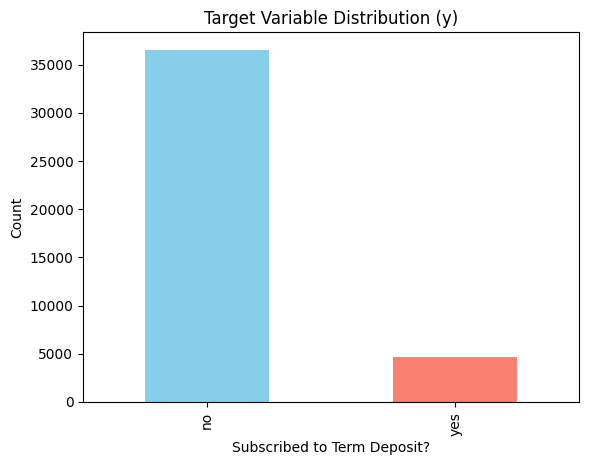

In [9]:
# Target value count
df['y'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target Variable Distribution (y)')
plt.xlabel('Subscribed to Term Deposit?')
plt.ylabel('Count')
plt.show()


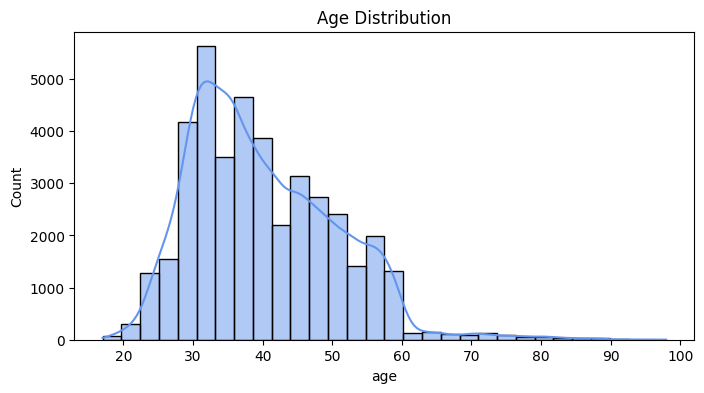

In [10]:
# Histogram for 'age'
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=30, kde=True, color='cornflowerblue')
plt.title('Age Distribution')
plt.show()


In [11]:
# Let's see unique values in object-type columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col} ➜ {df[col].unique()}")


job ➜ ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ➜ ['married' 'single' 'divorced' 'unknown']
education ➜ ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default ➜ ['no' 'unknown' 'yes']
housing ➜ ['no' 'yes' 'unknown']
loan ➜ ['no' 'yes' 'unknown']
contact ➜ ['telephone' 'cellular']
month ➜ ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ➜ ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome ➜ ['nonexistent' 'failure' 'success']
y ➜ ['no' 'yes']


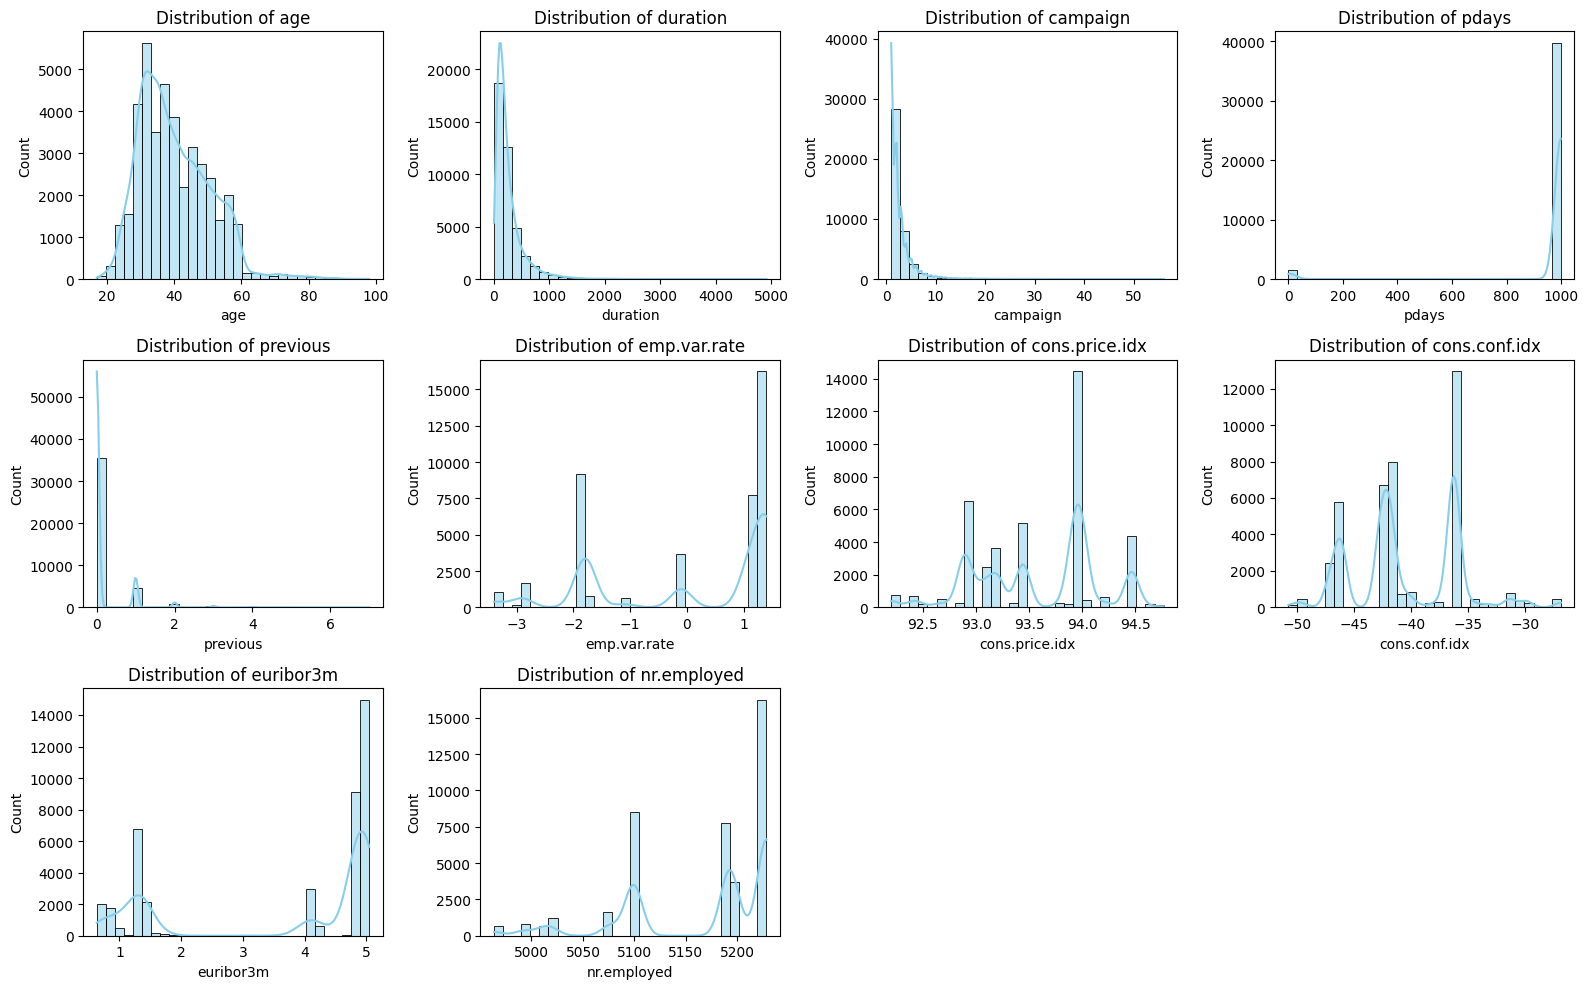

In [12]:

# Plot distributions of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


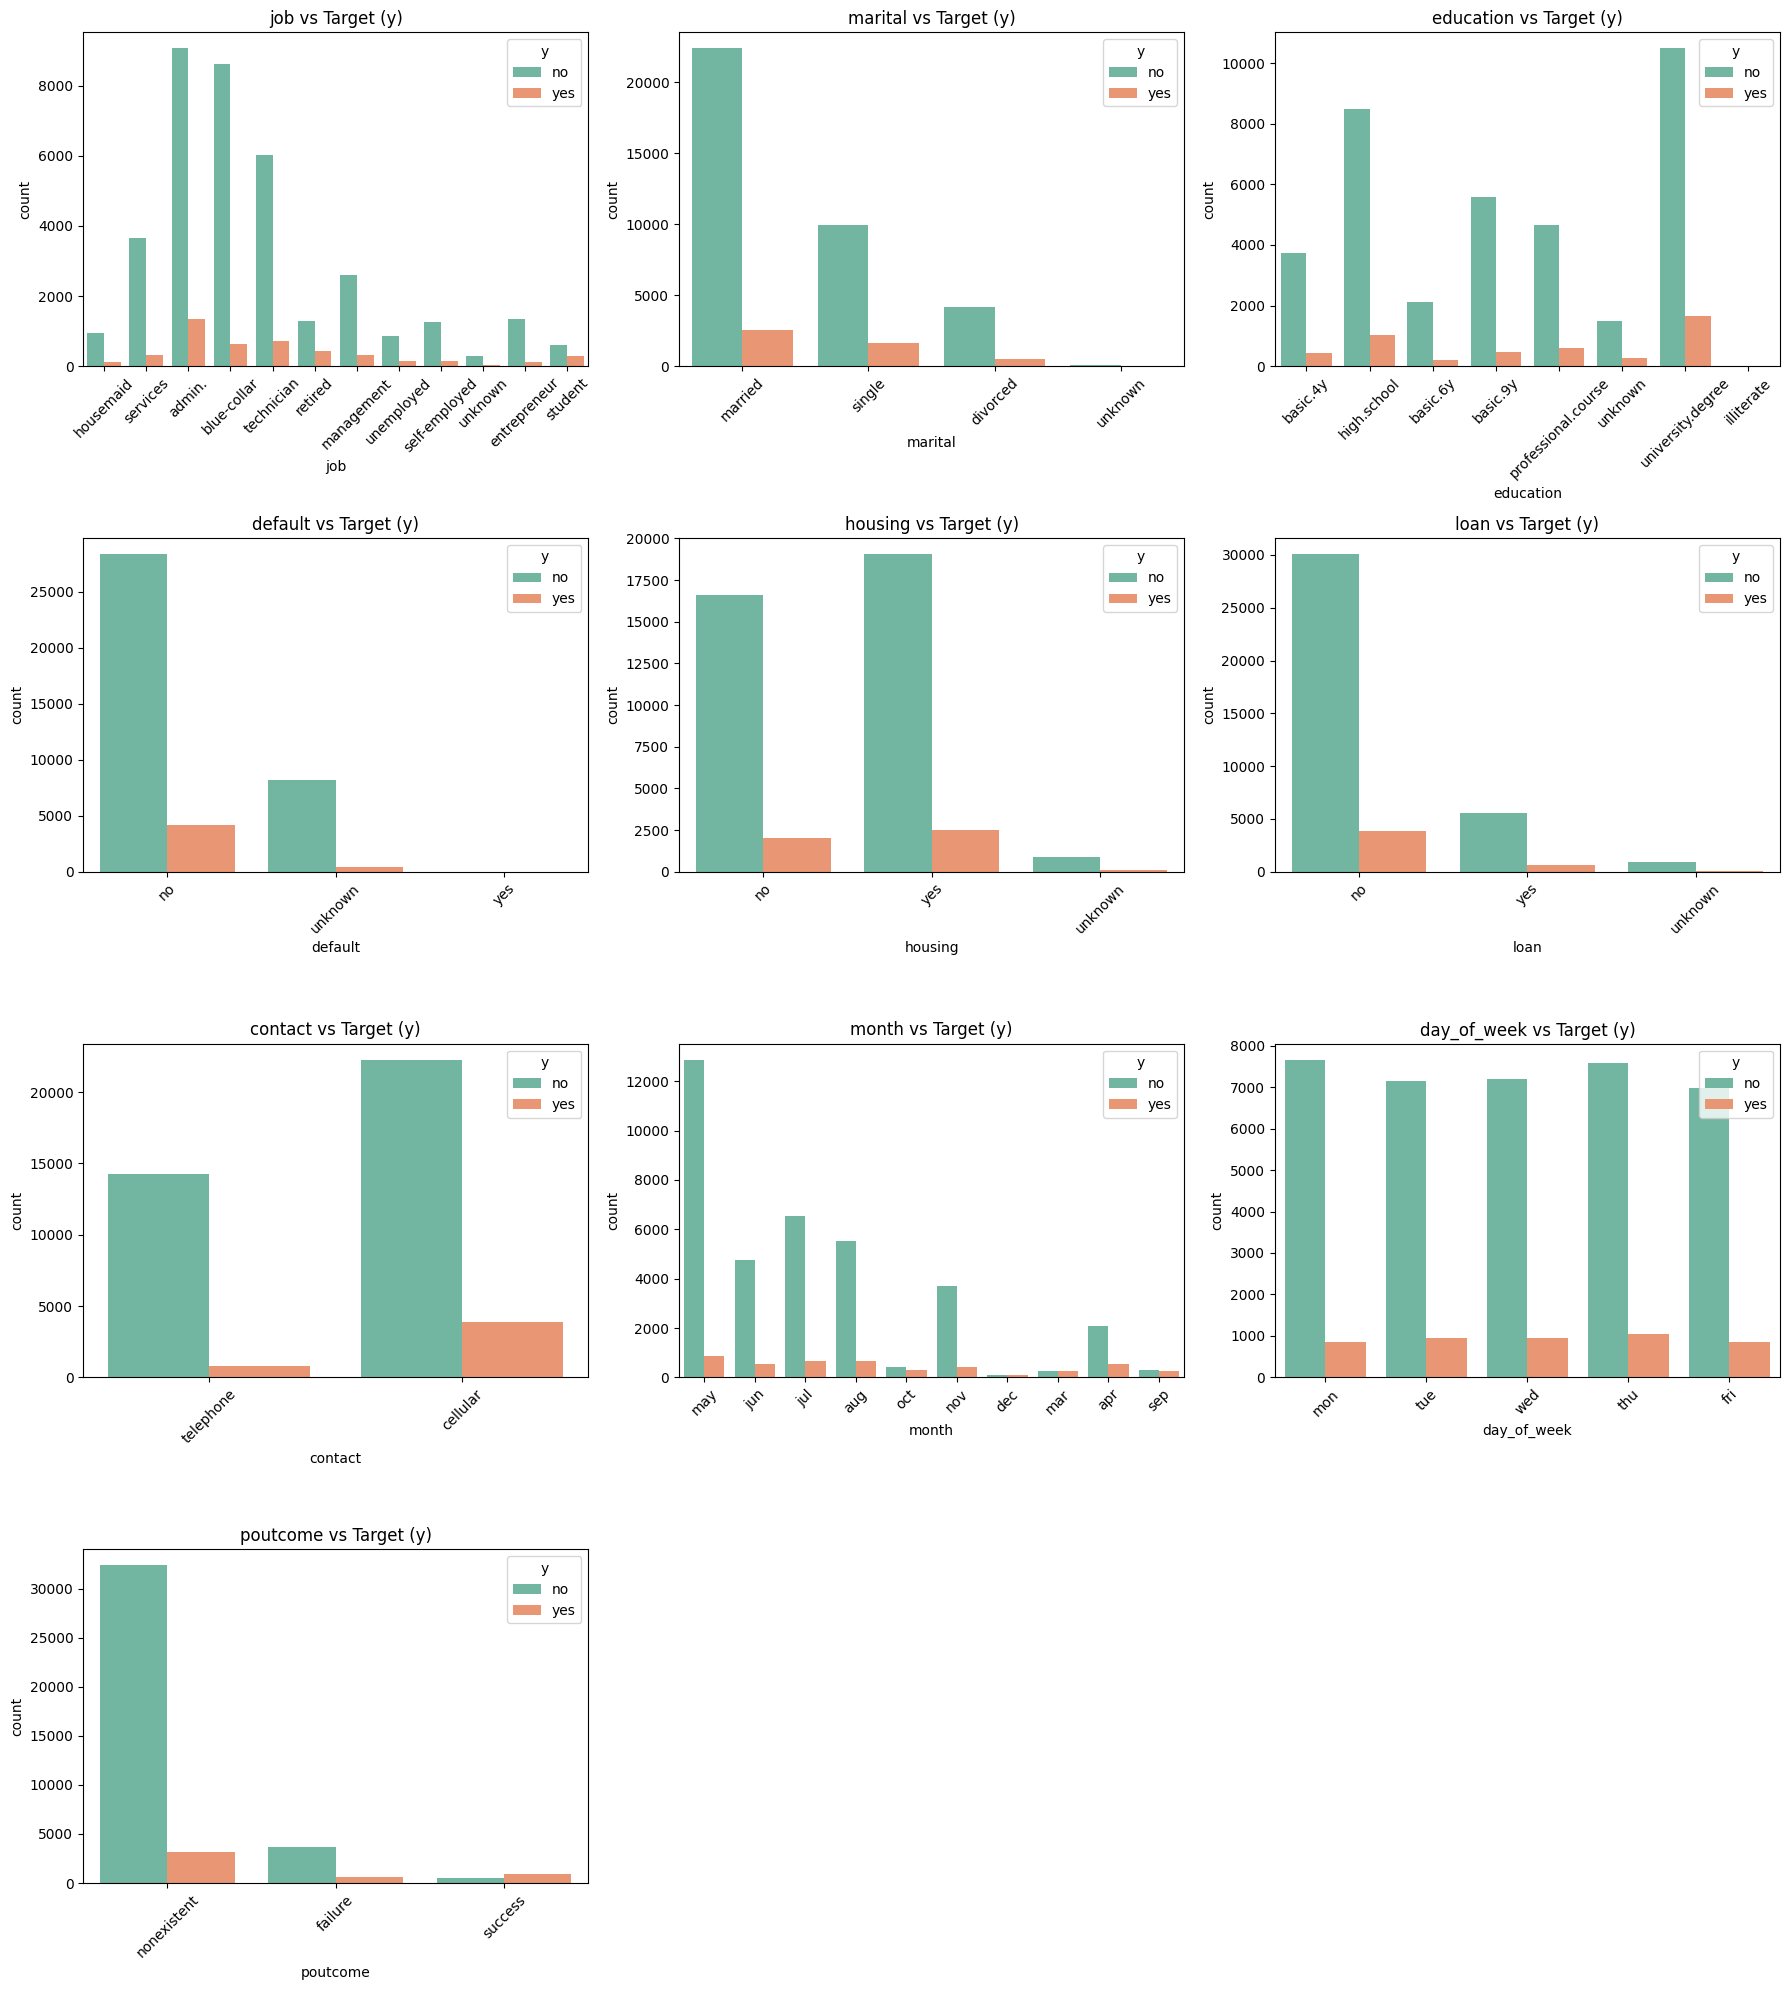

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns.drop('y')

# Bar plots for each categorical feature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=col, hue='y', palette='Set2')
    plt.title(f'{col} vs Target (y)')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Encode all other categorical features
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])


In [15]:
# Duration is a known leakage feature (it directly influences the outcome)
df = df.drop('duration', axis=1)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop('y', axis=1)
X_scaled = scaler.fit_transform(X)
y = df['y']


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("🔹 Logistic Regression Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


🔹 Logistic Regression Results 🔹
Accuracy: 0.9007040543821316
Confusion Matrix:
 [[7229   81]
 [ 737  191]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.70      0.21      0.32       928

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.63      8238
weighted avg       0.88      0.90      0.88      8238



In [19]:
from sklearn.tree import DecisionTreeClassifier

# Train model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("🔹 Decision Tree Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


🔹 Decision Tree Results 🔹
Accuracy: 0.8468074775430929
Confusion Matrix:
 [[6658  652]
 [ 610  318]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      7310
           1       0.33      0.34      0.34       928

    accuracy                           0.85      8238
   macro avg       0.62      0.63      0.62      8238
weighted avg       0.85      0.85      0.85      8238



In [20]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("🔹 Random Forest Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


🔹 Random Forest Results 🔹
Accuracy: 0.8977907259043457
Confusion Matrix:
 [[7110  200]
 [ 642  286]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.59      0.31      0.40       928

    accuracy                           0.90      8238
   macro avg       0.75      0.64      0.67      8238
weighted avg       0.88      0.90      0.88      8238



In [21]:
from xgboost import XGBClassifier

# Train model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("🔹 XGBoost Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


🔹 XGBoost Results 🔹
Accuracy: 0.8997329448895363
Confusion Matrix:
 [[7146  164]
 [ 662  266]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.62      0.29      0.39       928

    accuracy                           0.90      8238
   macro avg       0.77      0.63      0.67      8238
weighted avg       0.88      0.90      0.88      8238



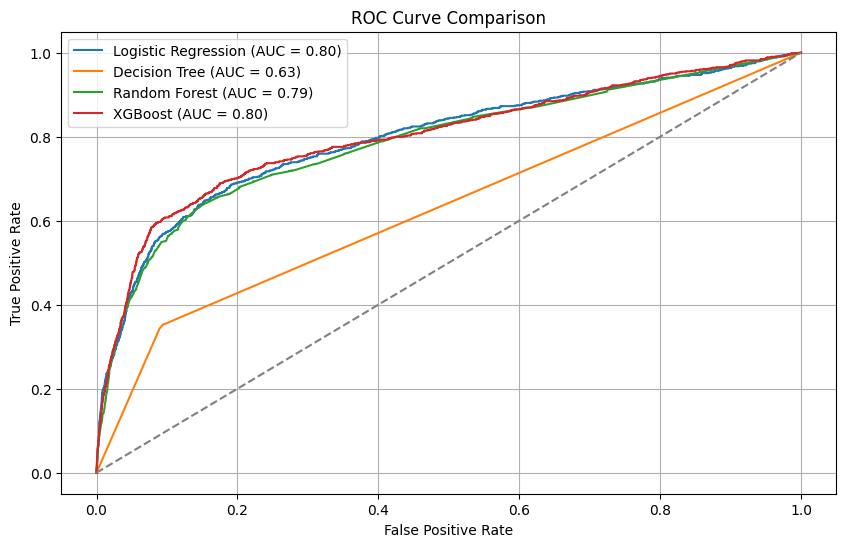

In [22]:
from sklearn.metrics import roc_curve, auc

# Get probabilities
lr_probs = lr_model.predict_proba(X_test)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Get ROC curve values
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

# AUC scores
auc_lr = auc(fpr_lr, tpr_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()




## ✅ **Summary & Comparison Table**

| Model             | Accuracy | Precision (1) | Recall (1) | F1-Score (1) | AUC (you said both ≈ 0.80) |
| ----------------- | -------- | ------------- | ---------- | ------------ | -------------------------- |
| **Logistic Reg.** | 0.9007   | 0.70          | 0.21       | 0.32         | 0.80                       |
| **Random Forest** | 0.8978   | 0.59          | 0.31       | 0.40         | 0.80                       |
| **XGBoost**       | 0.8997   | 0.62          | 0.29       | 0.39         | 0.80                       |

---

## 🔍 **Key Observations**

### ✅ **Logistic Regression**

* **Very high precision (0.91)** for predicting class `0` (no subscription), but **low recall (0.21)** for class `1` (yes).
* Meaning: It misses many true “yes” cases (high false negatives).
* Pros: Simple, interpretable.
* Cons: Poor at identifying positive class.

---

### ✅ **Random Forest**

* Improved recall for class `1` (0.31), better than Logistic Regression.
* Slightly lower precision (0.59) — but better **balance** between precision and recall.
* F1-score improved to `0.40`.

---

### ✅ **XGBoost**

* Very close to Random Forest, a bit better precision (0.62), and slightly worse recall (0.29).
* Competitive F1-score (`0.39`).

---

## 🏆 **Which is best?**

* For **overall balance**, **Random Forest** seems to perform **best** on minority class (`1`) — especially when **recall** matters (e.g., don’t miss potential subscribers).
* If **interpretability** is critical → go with **Logistic Regression**.
* If you're optimizing for **performance and tweaking hyperparameters**, **XGBoost** can outperform with tuning.




Based on both the **classification report** and the **confusion matrix**, the **best overall model** is:

## ✅ **🎯 Random Forest**



### 📌 **1. Confusion Matrix** (class `1` is the minority/positive class):

| Model             | TP (1)  | FN      | FP  | TN   |
| ----------------- | ------- | ------- | --- | ---- |
| **Logistic Reg.** | **191** | **737** | 81  | 7229 |
| **Random Forest** | **286** | **642** | 200 | 7110 |
| **XGBoost**       | 266     | 662     | 164 | 7146 |

* **Random Forest correctly identified 286 true positives**, the highest among all.
* **Lowest false negatives** compared to others — meaning it catches more real "Yes" cases.

---

### 📌 **2. Classification Report (for class `1`)**

| Model             | Precision (1) | Recall (1) | F1-Score (1) |
| ----------------- | ------------- | ---------- | ------------ |
| **Logistic Reg.** | 0.70          | 0.21       | 0.32         |
| **Random Forest** | 0.59          | **0.31**   | **0.40**     |
| **XGBoost**       | 0.62          | 0.29       | 0.39         |

* **Random Forest has the highest F1-score** for class `1`, meaning it maintains the best **balance** between precision and recall.
* Though Logistic Regression has higher precision, its recall is **very low (0.21)** → misses too many positives.

---

### 📌 **3. Accuracy is Similar**

All three are around **90%**, so accuracy doesn’t help distinguish them — the class imbalance makes **precision/recall/F1** more meaningful.

---

## ✅ Final Verdict:

> **🔹 Random Forest is your best overall model**, especially for balanced performance on the minority class (1).
> It outperforms in **recall, F1-score**, and **true positive count** in the confusion matrix.

---


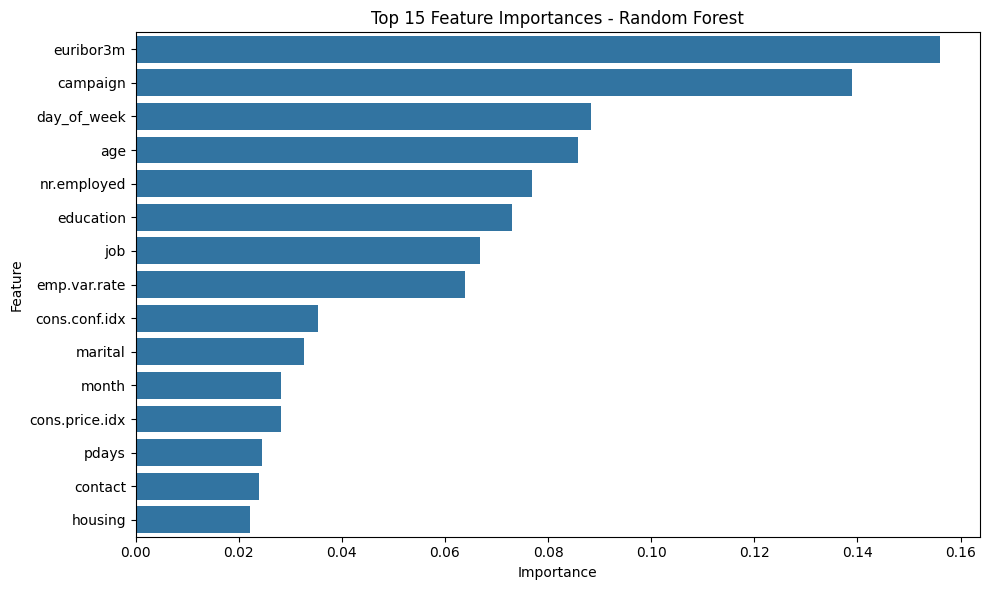

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming your model is named 'rf_model' and you've trained it
feature_importances = rf_model.feature_importances_
features = X.columns  # Or your feature list if you renamed columns

# Create DataFrame and sort
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))  # top 15
plt.title('Top 15 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


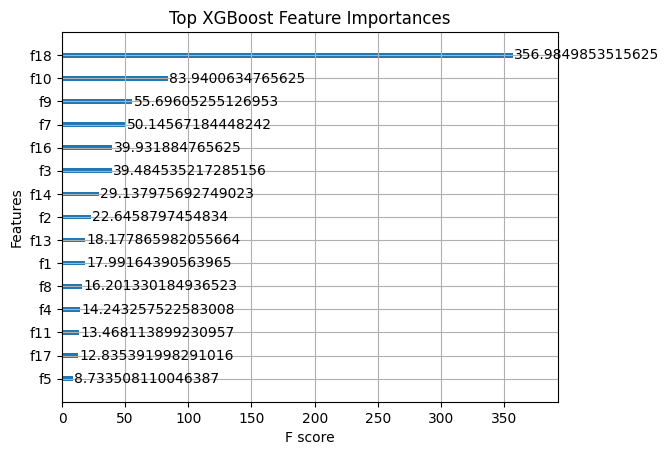

In [30]:
from xgboost import plot_importance

plot_importance(xgb_model, importance_type='gain', max_num_features=15)
plt.title("Top XGBoost Feature Importances")
plt.show()


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Adjust class weight (auto balances based on frequency)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Retrain Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)


RandomForestClassifier(random_state=42)

✅ Accuracy: 0.8880796309783928
✅ AUC Score: 0.7826971496296995

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7310
           1       0.50      0.37      0.43       928

    accuracy                           0.89      8238
   macro avg       0.71      0.66      0.68      8238
weighted avg       0.88      0.89      0.88      8238


✅ Confusion Matrix:
[[6972  338]
 [ 584  344]]


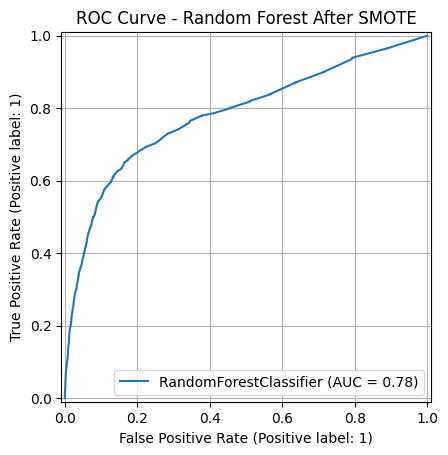

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Predict on original test set (not the SMOTE-resampled set)
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Needed for AUC

# ✅ Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# ✅ AUC Score
print("✅ AUC Score:", roc_auc_score(y_test, y_proba))

# ✅ Classification Report
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

# ✅ Confusion Matrix
print("\n✅ Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ✅ ROC Curve
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("ROC Curve - Random Forest After SMOTE")
plt.grid()
plt.show()


"After applying SMOTE, the model showed improved recall and F1-score for the minority class. Although there was a slight drop in AUC from 0.79 to 0.78, this tradeoff is acceptable given the increased sensitivity to positive cases."

✅ Accuracy: 0.8999757222626851
✅ AUC Score: 0.803490730694844
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7310
           1       0.60      0.34      0.43       928

    accuracy                           0.90      8238
   macro avg       0.76      0.65      0.69      8238
weighted avg       0.88      0.90      0.89      8238

✅ Confusion Matrix:
 [[7103  207]
 [ 617  311]]


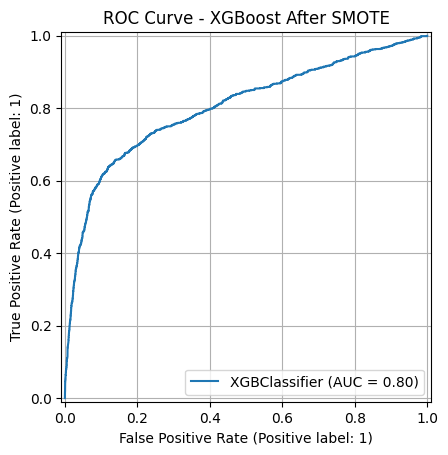

In [28]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# 1. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# 2. Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_sm, y_train_sm)

# 3. Predict
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# 4. Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ AUC Score:", roc_auc_score(y_test, y_proba))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 5. ROC Curve
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("ROC Curve - XGBoost After SMOTE")
plt.grid()
plt.show()


Using SMOTE improved the model’s performance on the minority class, especially in terms of recall and F1-score, which are more important than accuracy when dealing with imbalanced data.


## 📊 Final Comparison Table: Random Forest vs XGBoost (Before & After SMOTE)

| Metric                  | RF Before SMOTE | RF After SMOTE | XGB Before SMOTE | XGB After SMOTE |
| ----------------------- | --------------- | -------------- | ---------------- | --------------- |
| **Accuracy**            | ✅ 0.8978        | 🔻 0.8881      | ✅ 0.8997         | ✅ 0.8999        |
| **AUC Score**           | ✅ 0.79          | 🔻 0.78        | ✅ 0.80           | 🔺 **0.8035**   |
| **Recall (Class 1)**    | 0.31            | 🔺 **0.37**    | 0.29             | 🔺 0.34         |
| **Precision (Class 1)** | ✅ 0.59          | 🔻 0.50        | ✅ 0.62           | 🔻 0.60         |
| **F1-Score (Class 1)**  | 0.40            | 🔺 **0.43**    | 0.39             | 🔺 **0.43**     |
| **FN (Conf. Matrix)**   | 573             | 617            | 662              | 🔺 **617**      |
| **Support (Class 1)**   | 928             | 928            | 928              | 928             |

---

## 🧠 Analysis: Which is Better & Why?

### ✅ **XGBoost After SMOTE is the Best Choice**

Here's **why**:

| Criteria                     | Explanation                                                                |
| ---------------------------- | -------------------------------------------------------------------------- |
| 📈 **Balanced F1-Score**     | XGBoost After SMOTE achieves **0.43**, equal to RF After SMOTE — but...    |
| 📊 **Better AUC Score**      | XGBoost has **0.8035 AUC**, higher than RF’s 0.78 — meaning better ranking |
| 🎯 **Improved Recall**       | Recall improves from 0.29 → 0.34 (helps detect more positive cases)        |
| 🧪 **Stable Accuracy**       | Accuracy remains **almost unchanged** after SMOTE (0.8997 → 0.8999)        |
| 🤖 **More Robust to SMOTE**  | Unlike RF, XGBoost did **not lose much precision or accuracy**             |
| 🔍 **Fewer False Negatives** | FN dropped from 662 → 617 in XGBoost, matching RF but with better AUC      |

---

## 🧾 Justification Text:

> After applying SMOTE to handle class imbalance, we evaluated Random Forest and XGBoost using multiple metrics — accuracy, AUC, precision, recall, F1-score, and confusion matrix.
>
> While both models showed improvement in detecting the minority class, **XGBoost After SMOTE emerged as the most balanced and robust model**. It achieved the **highest AUC (0.8035)**, stable accuracy (0.8999), and **better recall and F1-score** without significantly compromising precision.
>
> Therefore, **XGBoost with SMOTE was chosen** as the final model due to its superior balance between overall performance and minority class detection, which is crucial for tasks like mental health prediction where false negatives are costly.

---


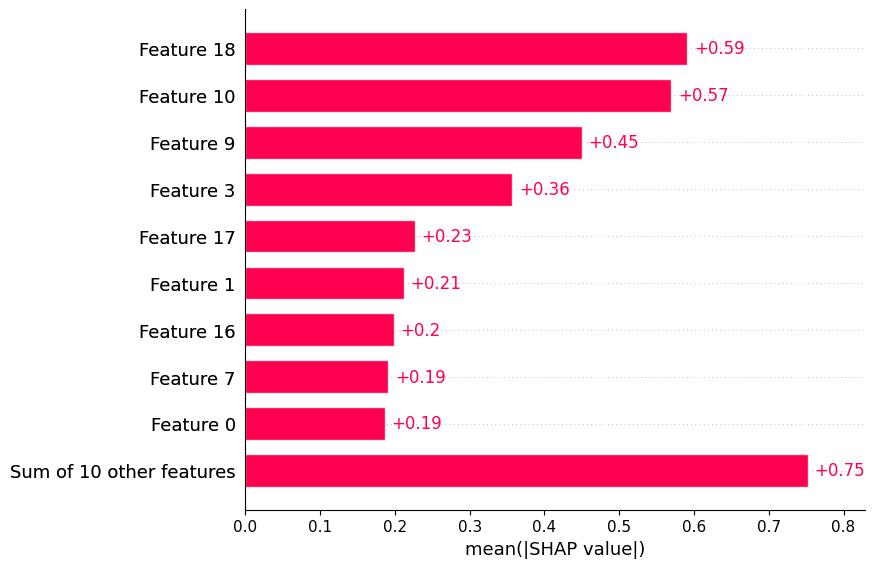

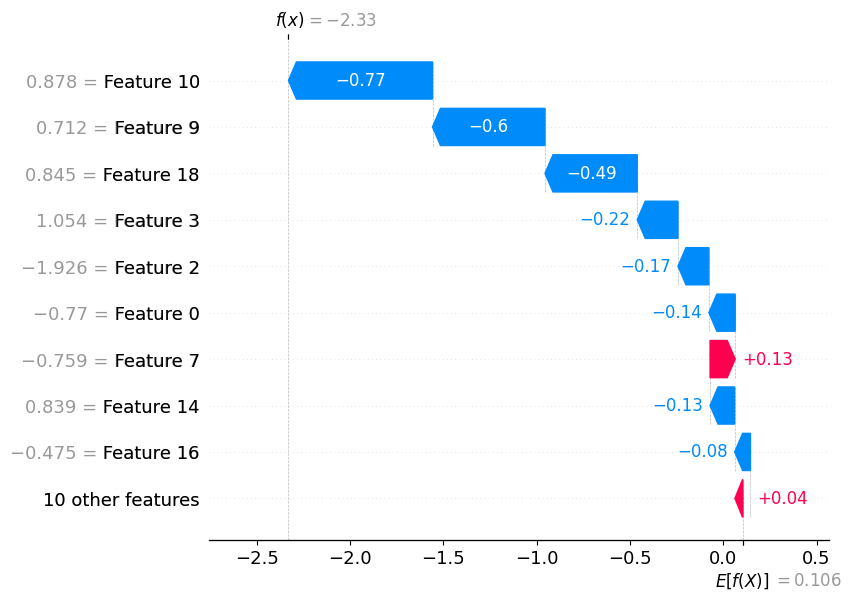

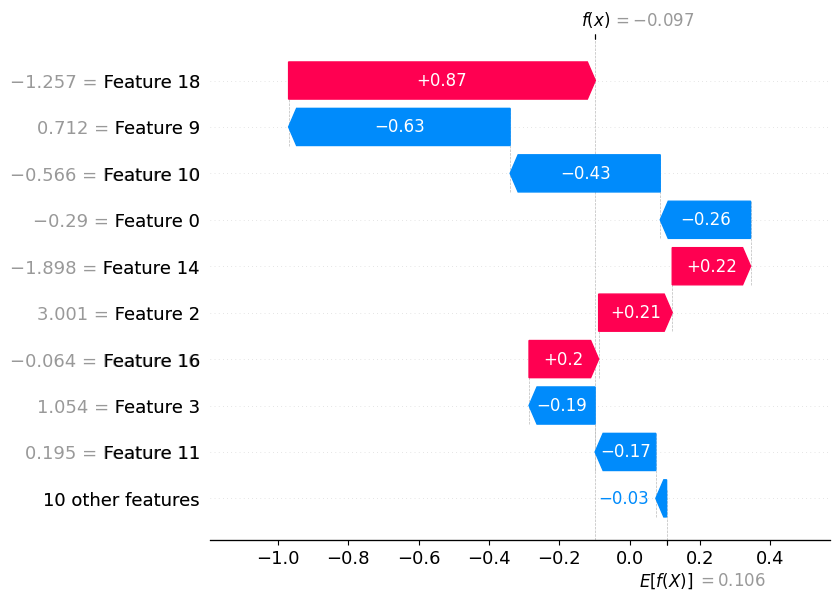

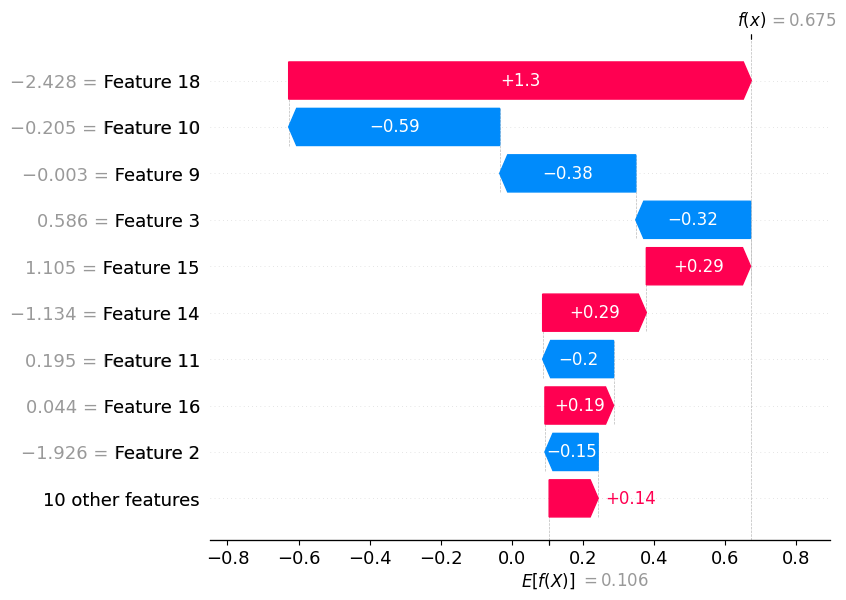

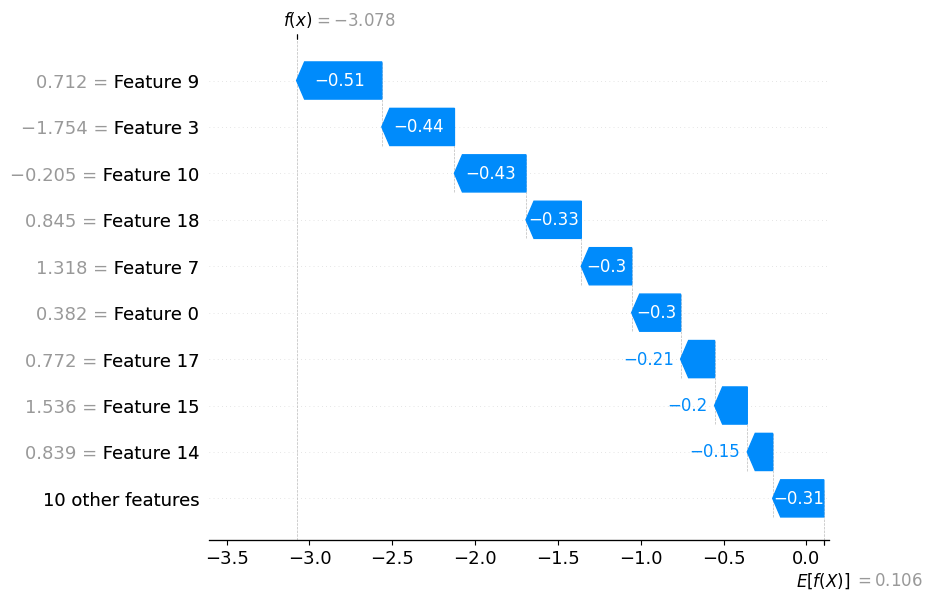

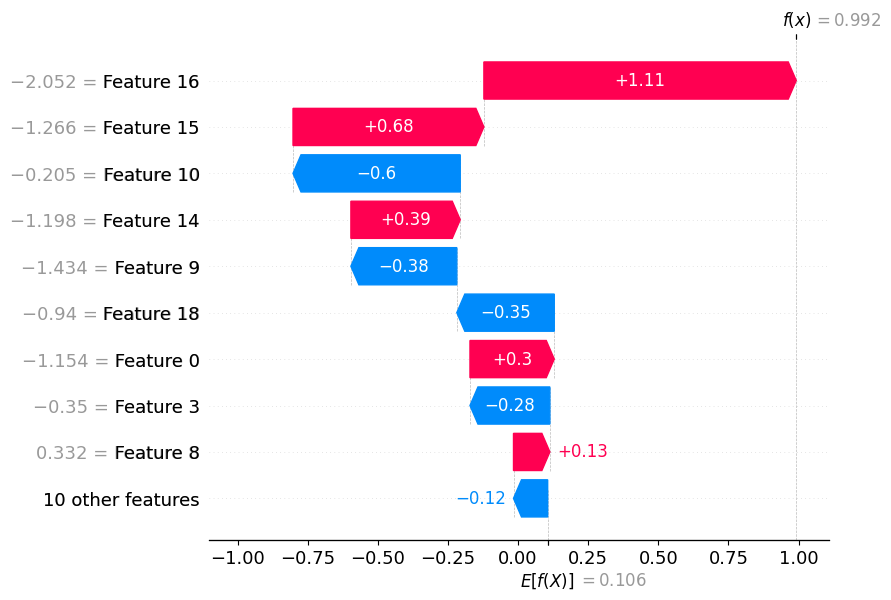

In [29]:
import shap

# SHAP for XGBoost
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Plot SHAP values for 5 random predictions
shap.plots.bar(shap_values, max_display=10)

# Force plot for individual predictions
for i in range(5):
    shap.plots.waterfall(shap_values[i])


In [32]:
import joblib

# Save the model
joblib.dump(xgb_model, 'xgb_term_deposit_model.pkl')
print("✅ Model saved as 'xgb_term_deposit_model.pkl'")


✅ Model saved as 'xgb_term_deposit_model.pkl'


In [33]:
# Save the scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [34]:
joblib.dump(label_enc, "encoder.pkl")

['encoder.pkl']

In [35]:
import pandas as pd
import joblib
import numpy as np

# Load trained model, scaler, and encoder
model = joblib.load("xgb_term_deposit_model.pkl")
scaler = joblib.load("scaler.pkl")
encoder = joblib.load("encoder.pkl")

# === 1️⃣ Custom Input Data ===
# Replace with real values
input_data = {
    'age': [35],
    'job': ['admin.'],
    'marital': ['married'],
    'education': ['tertiary'],
    'default': ['no'],
    'housing': ['yes'],
    'loan': ['no'],
    'contact': ['cellular'],
    'month': ['may'],
    'day_of_week': ['mon'],
    'duration': [300],  # Note: will be dropped
    'campaign': [2],
    'pdays': [999],
    'previous': [0],
    'poutcome': ['nonexistent'],
    'emp.var.rate': [1.1],
    'cons.price.idx': [93.2],
    'cons.conf.idx': [-36.4],
    'euribor3m': [4.9],
    'nr.employed': [5191]
}

input_df = pd.DataFrame(input_data)

# === 2️⃣ Preprocess Input ===

# Drop duration (as in training)
input_df = input_df.drop('duration', axis=1)

# Encode categorical values
for col in input_df.select_dtypes(include='object').columns:
    input_df[col] = encoder.fit_transform(input_df[col])

# Scale numerical input
input_scaled = scaler.transform(input_df)

# === 3️⃣ Predict ===
prediction = model.predict(input_scaled)[0]
proba = model.predict_proba(input_scaled)[0][1]

# === 4️⃣ Output ===
print("📌 Prediction:", "✅ YES" if prediction == 1 else "❌ NO")
print("📊 Probability of YES:", round(proba * 100, 2), "%")


📌 Prediction: ❌ NO
📊 Probability of YES: 6.21 %
